<a href="https://colab.research.google.com/github/Manav518/MainCraft-Internship-Task-3/blob/main/EDA_on_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("tested.csv")

# 2.Clean Dataset

In [4]:
# Fill missing Age values with mean
df["Age"] = df["Age"].fillna(df["Age"].mean())

# Drop irrelevant columns
df_clean = df.drop(columns=["Cabin", "Name", "Ticket"])

# 3. Analysis Question

In [6]:
# Create Age Groups
bins = [0, 12, 18, 30, 50, 80]
labels = ["Child", "Teen", "Young Adult", "Adult", "Senior"]
df_clean["AgeGroup"] = pd.cut(df_clean["Age"], bins=bins, labels=labels)

# Create Family Size
df_clean["FamilySize"] = df_clean["SibSp"] + df_clean["Parch"]

# Survival rate by Age Group
agegroup_survival = df_clean.groupby("AgeGroup", observed=False)["Survived"].mean()
print("Survival Rate by Age Group:\n", agegroup_survival, "\n")

# Survival rate by Embarkation Port
embark_survival = df_clean.groupby("Embarked")["Survived"].mean()
print("Survival Rate by Embarkation Port:\n", embark_survival, "\n")

# Survival rate by Family Size
family_survival = df_clean.groupby("FamilySize")["Survived"].mean()
print("Survival Rate by Family Size:\n", family_survival, "\n")

Survival Rate by Age Group:
 AgeGroup
Child          0.480000
Teen           0.413793
Young Adult    0.363014
Adult          0.320856
Senior         0.483871
Name: Survived, dtype: float64 

Survival Rate by Embarkation Port:
 Embarked
C    0.392157
Q    0.521739
S    0.325926
Name: Survived, dtype: float64 

Survival Rate by Family Size:
 FamilySize
0     0.268775
1     0.486486
2     0.526316
3     0.714286
4     0.285714
5     0.666667
6     0.250000
7     0.500000
10    0.500000
Name: Survived, dtype: float64 



# 4. Visualization


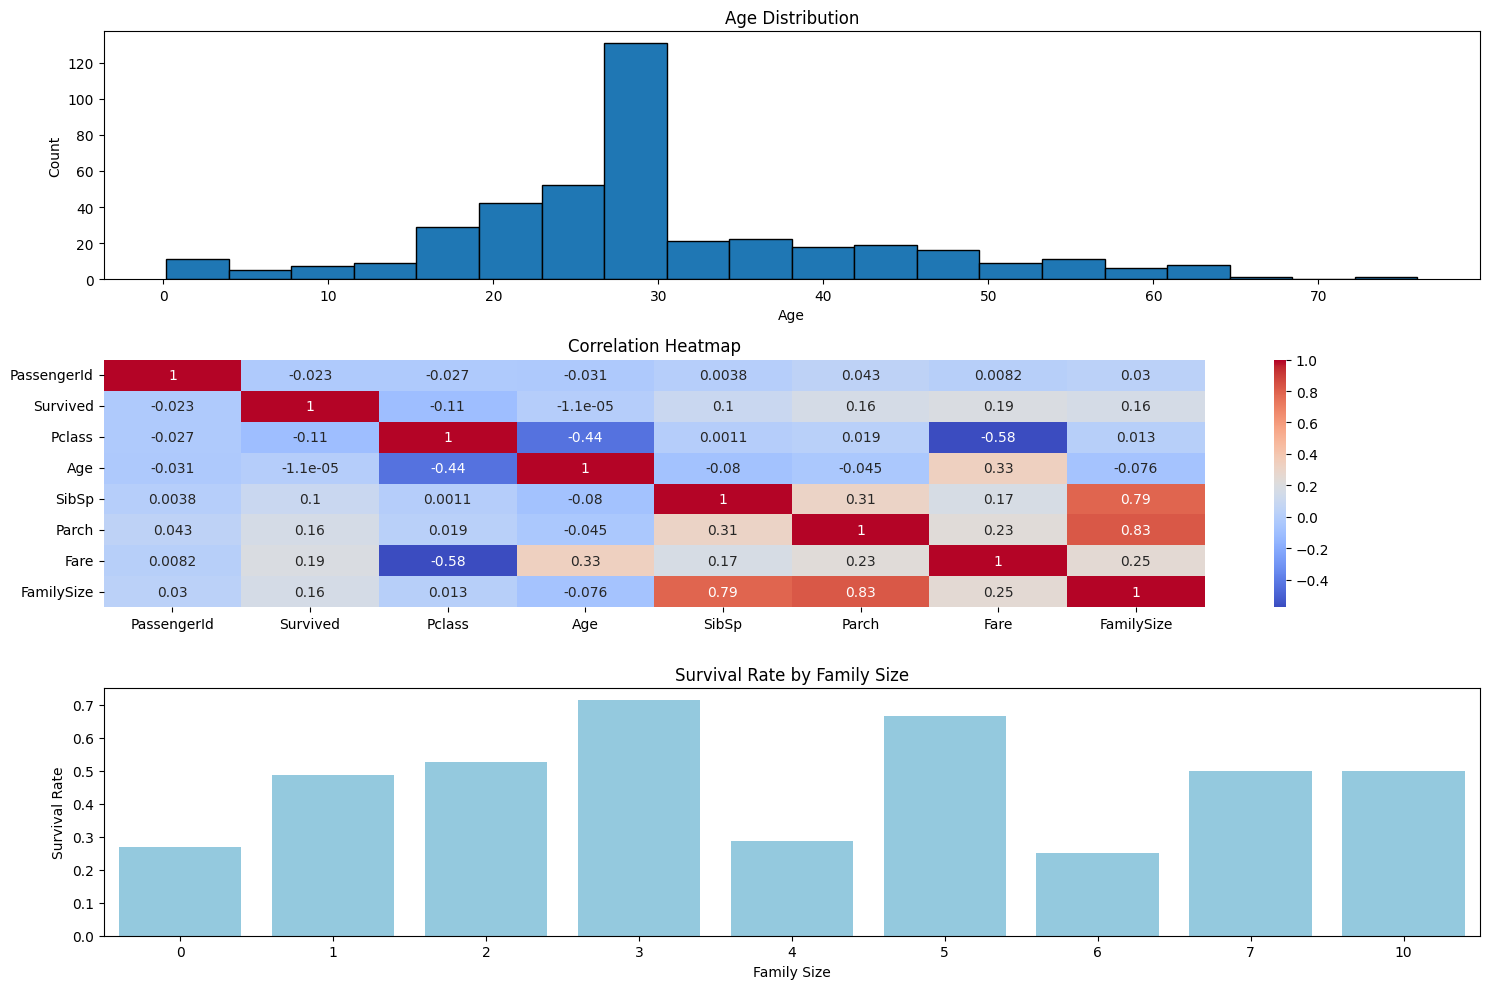

In [8]:
plt.figure(figsize=(15, 10))

# 1. Age Distribution
plt.subplot(3, 1, 1)
plt.hist(df_clean["Age"], bins=20, edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

# 2. Correlation Heatmap
plt.subplot(3, 1, 2)
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

# 3. Survival by Family Size
plt.subplot(3, 1, 3)
sns.barplot(x=family_survival.index, y=family_survival.values, color="skyblue")
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")

plt.tight_layout()
plt.show()